# **Perceptron**
**Aluno:** Pedro Victor Andrade Alves

**Matrícula:** 20190001079


O **objetivo** desse projeto é treinar uma **rede neural** do tipo **Perceptron** para aprender o funcionamento de uma **porta lógica AND**. A base de dados escolhida são as entradas possíveis, com valores binários, considerando uma porta AND de duas entradas. Segue a tabela com os valores de entrada e as respectivas saídas esperadas:

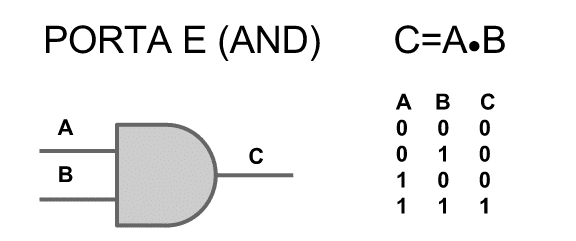



## **Rede perceptron com sklearn**

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import perceptron
import pandas as pd

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.linear_model.perceptron module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


In [32]:
inputs = pd.DataFrame({
'A'       : [0, 0, 1, 1],
'B'       : [0, 1, 0, 1],
'Targets' : [0, 0, 0, 1]
})

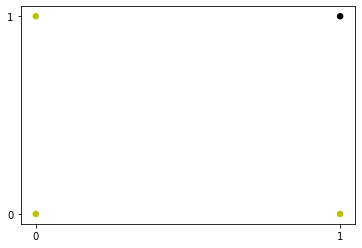

In [33]:
colormap = np.array(['y', 'k'])
plt.xticks([0,1])
plt.yticks([0,1])
plt.scatter(inputs.A, inputs.B, c=colormap[inputs.Targets], s=30)

### **Criação da Rede Perceptron:**

In [34]:
# Rede neural Perceptron com auxílio da biblioteca sklearn

# Número de interações = 100
# Taxa de aprendizagem = 0.002
# fit_intercept = True (deve estimar interceptações)
# random_state = None (indica a semente do gerador de números pseudo-aleatórios a ser usado ao embaralhar os dados)

# Definição de alguns parâmetros da rede (Perceptron)
network = perceptron.Perceptron(n_iter_no_change=100, verbose=0, random_state=None, fit_intercept=True, eta0=0.002)

### **Treino:**

In [35]:
network.fit(inputs[['A', 'B']],inputs['Targets']) # Treino

print("Coefficient 0: " + str(network.coef_[0,0]))
print("Coefficient 1: " + str(network.coef_[0,1]))
print("Bias " + str(network.intercept_)) # Viés

Coefficient 0: 0.004
Coefficient 1: 0.006
Bias [-0.008]


### **Teste:**

In [36]:
pred = network.predict(inputs[['A', 'B']]) # Teste
print("Entradas 1: ", np.array(inputs.A))
print("Entradas 2: ", np.array(inputs.B))
print("Predição: ", pred) # Resultado do Teste
print("\n")
print("Resultado Esperado: ", np.array(inputs.Targets)) # Resultado Esperado


Entradas 1:  [0 0 1 1]
Entradas 2:  [0 1 0 1]
Predição:  [0 0 0 1]


Resultado Esperado:  [0 0 0 1]


### **Métrica**

**Análise do desempenho do modelo trainado**

In [37]:
print("Acurácia: ", network.score(inputs[['A', 'B']], inputs[['Targets']]) * 100, "%", sep='') # Métrica

Acurácia: 100.0%


## **Rede perceptron desenvolvida manualmente**

In [ ]:
import numpy as np 
# Base de dados
# Classe 0  
A = np.array([0, 0]) 
B = np.array([0, 1])
# Classe 1 
C = np.array( [1, 1]) 
# Pesos iniciais 
Pesos = np.array([0.4, 0.6]) 
# Taxa de aprendizagem 
eta = 0.4 
# Viés 
bias = 0.5 

In [ ]:
# Função para a soma ponderada 
# u = x0*w0 +  x1*w1 + x2*w2 -1*θ 
# m = x0*w0 +  x1*w1 + x2*w2
# u = m -1*θ
def somaPonderada(X,W):
  bias = 0.5 
  m = np.multiply(X,W)
  u = np.sum(m) -1*bias
  return u 

In [ ]:
# Função de ativação 
# Função Degrau 
def funcaoAtivacao(u):
  if u >= 0:
    return 1
  else:
    return 0

In [ ]:
# Função de saída 
def saida(X,W):
  u = somaPonderada(X,W)
  return funcaoAtivacao(u) 

In [ ]:
# Função para ajustes dos pesos
# Parte cententral do processo de aprendizagem 
# novo wi  →  wi = wi +  η xi (d - y ) 
def ajustaPesos(eta,W,X,bias,d,y):
  e = d - y 
  novoW = W + eta*X*e
  novoB = bias + eta*(-1)*e 
  return novoW, novoB  

### **Treino:**

**Iteração 1**

In [ ]:
# Entrada 00 saída 0 
d = 0 
y = saida(A,Pesos) 
print(y)
# Ajuste dos pesos 
Pesos,bias = ajustaPesos(eta,Pesos,A,bias,d,y) 
print(Pesos)
print(bias) 

# Entrada 01 saída 0 
d = 0 
y = saida(B,Pesos) 
print(y)
# Ajuste dos pesos 
Pesos,bias = ajustaPesos(eta,Pesos,B,bias,d,y) 
print(Pesos)
print(bias)

# Entrada 11 saída 1
d = 1 
y = saida(C,Pesos) 
print(y)
# Ajuste dos pesos 
Pesos,bias = ajustaPesos(eta,Pesos,C,bias,d,y) 
print(Pesos)
print(bias)

0
[0.4 0.6]
0.5
1
[0.4 0.2]
0.9
1
[0.4 0.2]
0.9


**Iteração 2**

In [ ]:
# Entrada 00 saída 0 
d = 0 
y = saida(A,Pesos) 
print(y)
# Ajuste dos pesos 
Pesos,bias = ajustaPesos(eta,Pesos,A,bias,d,y) 
print(Pesos)
print(bias) 

# Entrada 01 saída 0 
d = 0 
y = saida(B,Pesos) 
print(y)
# Ajuste dos pesos 
Pesos,bias = ajustaPesos(eta,Pesos,B,bias,d,y) 
print(Pesos)
print(bias)

# Entrada 11 saída 1
d = 1 
y = saida(C,Pesos) 
print(y)
# Ajuste dos pesos 
Pesos,bias = ajustaPesos(eta,Pesos,C,bias,d,y) 
print(Pesos)
print(bias)

0
[0.4 0.2]
0.9
0
[0.4 0.2]
0.9
1
[0.4 0.2]
0.9


**Iteração 3**

In [ ]:
# Entrada 00 saída 0 
d = 0 
y = saida(A,Pesos) 
print(y)
# Ajuste dos pesos 
Pesos,bias = ajustaPesos(eta,Pesos,A,bias,d,y) 
print(Pesos)
print(bias) 

# Entrada 01 saída 0 
d = 0 
y = saida(B,Pesos) 
print(y)
# Ajuste dos pesos 
Pesos,bias = ajustaPesos(eta,Pesos,B,bias,d,y) 
print(Pesos)
print(bias)

# Entrada 11 saída 1
d = 1 
y = saida(C,Pesos) 
print(y)
# Ajuste dos pesos 
Pesos,bias = ajustaPesos(eta,Pesos,C,bias,d,y) 
print(Pesos)
print(bias)

0
[0.4 0.2]
0.9
0
[0.4 0.2]
0.9
1
[0.4 0.2]
0.9


### **Teste**

A que classe pertence a entrada 10?

In [ ]:
# Entrada 10
T = np.array([1, 0]) 
print("Saida para ",T," é ", saida(T,Pesos))

Saida para  [1 0]  é  0
